# Desafio Cinetista de Dados INDICIUM

Este relatório e todos os arquivos necessários estão disponíveis [neste repositório público](https://github.com/ivanrff/lh-2025-11).

In [7]:
import pickle, nltk
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from wordcloud import WordCloud

from nltk.corpus import stopwords

from overview_utils import get_word_count_average, word_freq

from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate, KFold
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Recursos necessários do NLTK (executar uma vez)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\User\Desktop\VSCode\lh-2025-
[nltk_data]     11\.venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\User\Desktop\VSCode\lh-2025-
[nltk_data]     11\.venv\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     c:\Users\User\Desktop\VSCode\lh-2025-
[nltk_data]     11\.venv\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Carregando os dados

In [8]:
df = pd.read_csv("data/desafio_indicium_imdb_final.csv", index_col=0)

# Informações Iniciais

In [9]:
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,tmdb_id,imdb_id
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",238,tt0068646
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",155,tt0468569
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",240,tt0071562
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",389,tt0050083
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905",122,tt0167260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,164,tt0054698
996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,"32,855,818",1712,tt0049261
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000",11426,tt0045793
998,Lifeboat,1944,12,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,13321,tt0037017


Pode-se visualizar que o dataset é ordenado com base em IMDB_rating, de forma descendente.

## Checando os dtypes das colunas

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     875 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          879 non-null    object 
 15  tmdb_id        999 non-null    int64  
 16  imdb_id        999 non-null    object 
dtypes: float64(2), int64(2), object(13)
memory usage: 140.5+ KB

É preciso tratar algumas colunas:
- Released_Year: a coluna deveria ser ```int```.
- Runtime: a coluna de duração do filme está em formato ```object``` porque tem o texto ```' mins'``` junto aos minutos.
- Gross: a coluna de renda bruta está em formato ```object``` porque os números possuem vírgulas separando milhões e milhares.

## Checando por dados nulos

In [11]:
nrows_df = df.shape[0]
nrows_df_na = df[df.isna().any(axis=1)].shape[0]

perc_na = 100 * (nrows_df_na)/nrows_df
print(f"{perc_na:.2f}% das linhas têm algum valor faltante em df")

# nos dados originais, 28.63% das linhas tinham algum valor faltante em df

19.32% das linhas têm algum valor faltante em df


In [12]:
print(f'Colunas com dados vazios: \n{df.isnull().sum()[df.isnull().sum() > 0]}')


Colunas com dados vazios: 
Meta_score    124
Gross         120
dtype: int64


As colunas ```Certificate```, ```Meta_score``` e ```Gross``` tinham entre 10 a 15% de valores faltantes com o dataframe original.

Agora, as colunas com dados vazios são apenas ```Meta_score``` e ```Gross``` com ~12% cada, o que é uma quantidade considerável. Utilizar o ```dropna()``` removeria 19% da base de dados.

## Checando por colunas duplicadas

In [13]:
print(f"{df.duplicated().sum()} linhas duplicadas em df")

0 linhas duplicadas em df


# Tratamento de Dados

## Released_Year

In [14]:
# df['Released_Year'].astype(int, errors='raise')

O código anterior retorna um erro que 'PG' não pode virar integer.

In [15]:
# Checando os valores que a coluna possui
df['Released_Year'].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [16]:
# Será que houve um erro de leitura? 'PG' é um valor válido para Certificate
df[df['Released_Year']=='PG']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,tmdb_id,imdb_id
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933",568,tt0112384


Não foi um erro de leitura, as outras colunas estão corretas. Segundo o IMDB, Apollo 13 foi um filme de 1995.

In [17]:
# Editar o valor de Released_Year de 'Apollo 13'
df.loc[df["Series_Title"] == "Apollo 13", "Released_Year"] = 1995
df[df['Series_Title']=='Apollo 13']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,tmdb_id,imdb_id
966,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933",568,tt0112384


In [18]:
df['Released_Year'] = df['Released_Year'].astype(int)

## Runtime e Gross

In [19]:
# Transformando a coluna 'Runtime' em numérica, removendo o texto ' min'
df['Runtime'] = df['Runtime'].str.replace(" min", "").astype(int)

df['Gross'] = df['Gross'].str.replace(",", "").astype(float) # float pra aceitar os NaN, usar int dá erro

In [20]:
# checando os Dtypes resultantes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     875 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          879 non-null    float64
 15  tmdb_id        999 non-null    int64  
 16  imdb_id        999 non-null    object 
dtypes: float64(3), int64(4), object(10)
memory usage: 140.5+ KB

## Certificate (Classificação Etária)

A coluna certificate pode ser alterada para a idade mínima permitida para facilitar a leitura.

In [21]:
df['Certificate'].value_counts()

Certificate
U                 236
A                 196
UA                175
R                 146
PG                 44
PG-13              43
Passed             34
12                 22
16                 16
G                  16
M                  12
Approved           11
18                  5
6                   5
14                  4
18+                 3
TV-PG               3
15+                 3
GP                  2
13                  2
+18                 2
MA 15+              2
MA15+               2
TV-MA               1
Unrated             1
15                  1
e 14                1
TV-14               1
Não Encontrado      1
e Livre             1
12+                 1
13+                 1
12 anos             1
AL                  1
AA                  1
14A                 1
R 18+               1
U/A                 1
Name: count, dtype: int64

In [22]:
certificate_map = {
    'U': 0,
    'A': 0,
    'UA': 12,
    'PG': 10,
    'G': 0,
    'Passed': 0,
    'Approved': 0,
    'Unrated': 18,
    'e Livre': 0,
    'AL': 0,
    'e 14': 14,
    'AA': 12,
    'M': 16,
    'GP': 14,
    'R': 18,
    'R 18+': 18,
    'PG-13': 13,
    'TV-PG': 10,
    'TV-14': 14,
    'TV-MA': 18,
    'MA 15+': 15,
    'MA15+': 15,
    'U/A': 12,
    'Não Encontrado': 18,
    '12': 12,
    '12+': 12,
    '12 anos': 12,
    '13': 13,
    '13+': 13,
    '14': 14,
    '14A': 14,
    '15': 15,
    '15+': 15,
    '16': 16,
    '18': 18,
    '18+': 18,
    '+18': 18,
    '6': 6,
}

# aplicando ao dataframe
df["Certificate"] = df["Certificate"].map(certificate_map)
df = df.rename(columns={"Certificate": "Age_Rating"})

In [23]:
print(f"{100*df["Age_Rating"].isna().sum()/df.shape[0]:.2f}% das linhas da coluna 'Age_Rating' são nulas.")

0.00% das linhas da coluna 'Age_Rating' são nulas.


No dataframe original, 10.21% das linhas da coluna 'Age_Rating' (anteriormente 'Certificate') eram nulas.

## Director

Na elaboração de um gráfico em uma seção posterior, o ator que apareceu com maior mediana de ```Gross``` foi Joe Russo, mas Joe Russo não é ator, é diretor junto com seu irmão Anthony.

In [24]:
df[df['Star1'] == 'Joe Russo'][['Series_Title', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']]

,Series_Title,Director,Star1,Star2,Star3,Star4
59,Avengers: Endgame,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo
60,Avengers: Infinity War,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo
583,Captain America: Civil War,Anthony Russo,Joe Russo,Chris Evans,Robert Downey Jr.,Scarlett Johansson
737,Captain America: The Winter Soldier,Anthony Russo,Joe Russo,Chris Evans,Samuel L. Jackson,Scarlett Johansson


In [25]:
# Corrigindo o erro de 'Joe Russo'
df["Director"] = df["Director"].replace({'Anthony Russo': 'Anthony and Joe Russo'})
df.loc[df['Series_Title'] == 'Avengers: Endgame', ['Star1', 'Star2', 'Star3', 'Star4']] = ['Robert Downey Jr.', 'Chris Evans', 'Mark Ruffalo', 'Chris Hemsworth']
df.loc[df['Series_Title'] == 'Avengers: Infinity War', ['Star1', 'Star2', 'Star3', 'Star4']] = ['Robert Downey Jr.', 'Chris Hemsworth', 'Mark Ruffalo', 'Chris Evans']
df.loc[df['Series_Title'] == 'Captain America: Civil War', ['Star1', 'Star2', 'Star3', 'Star4']] = ['Chris Evans', 'Robert Downey Jr.', 'Scarlett Johansson', 'Sebastian Stan']
df.loc[df['Series_Title'] == 'Captain America: The Winter Soldier', ['Star1', 'Star2', 'Star3', 'Star4']] = ['Chris Evans', 'Samuel L. Jackson', 'Scarlett Johansson', 'Robert Redford']

# Conferindo
df[df['Director'] == 'Anthony and Joe Russo'][['Series_Title', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']]

,Series_Title,Director,Star1,Star2,Star3,Star4
59,Avengers: Endgame,Anthony and Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
60,Avengers: Infinity War,Anthony and Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,Chris Evans
583,Captain America: Civil War,Anthony and Joe Russo,Chris Evans,Robert Downey Jr.,Scarlett Johansson,Sebastian Stan
737,Captain America: The Winter Soldier,Anthony and Joe Russo,Chris Evans,Samuel L. Jackson,Scarlett Johansson,Robert Redford


## Meta_score

In [26]:
df['Meta_score'].isna().sum()

np.int64(124)

Meta_score é um método de agregação de avaliações críticas semelhante ao IMDB, apesar de serem websites diferentes. Substituir valores ausentes pelo valor de IMDB me parece uma decisão segura.

In [27]:
# preencher os dados vazios em Meta_score utilizando os valores de IMDB_Rating * 10
df['Meta_score'] = df['Meta_score'].fillna(df['IMDB_Rating'] * 10)

## Drop NA (Inativo)

Após os tratamentos acima, apenas 12% das linhas têm valor faltante, todas em 'Gross'.

In [28]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 1 to 997
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   879 non-null    object 
 1   Released_Year  879 non-null    int64  
 2   Age_Rating     879 non-null    int64  
 3   Runtime        879 non-null    int64  
 4   Genre          879 non-null    object 
 5   IMDB_Rating    879 non-null    float64
 6   Overview       879 non-null    object 
 7   Meta_score     879 non-null    float64
 8   Director       879 non-null    object 
 9   Star1          879 non-null    object 
 10  Star2          879 non-null    object 
 11  Star3          879 non-null    object 
 12  Star4          879 non-null    object 
 13  No_of_Votes    879 non-null    int64  
 14  Gross          879 non-null    float64
 15  tmdb_id        879 non-null    int64  
 16  imdb_id        879 non-null    object 
dtypes: float64(3), int64(5), object(9)
memory usage: 123.6+ KB


# Entendimento dos dados individualmente em cada Coluna

In [29]:
# Formatador de números para gráficos
def to_mils(decimals):
    if decimals == 0:
        def round_int(x, pos):
            return f'{int(x/1e6)}M'
        return round_int
    else:
        def round_float(x, pos):
            return f'{round(x/1e6, decimals)}M'
        return round_float

def to_bils(decimals):
    if decimals == 0:
        def round_int(x, pos):
            return f'{int(x/1e9)}B'
        return round_int
    else:
        def round_float(x, pos):
            return f'{round(x/1e9, decimals)}B'
        return round_float

## Released_Year

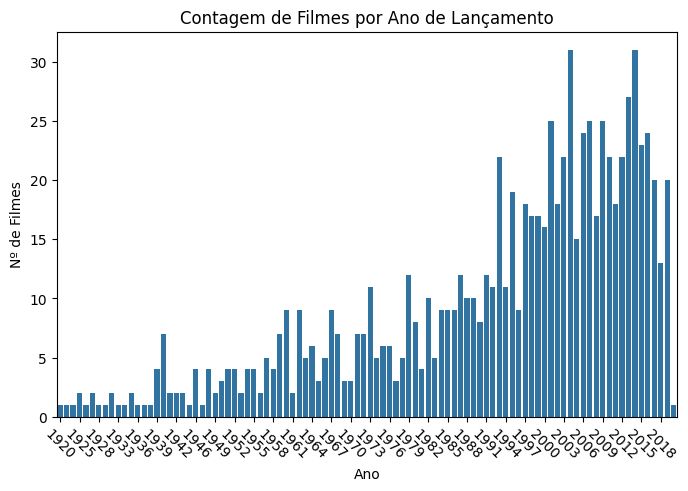

In [30]:
# Contagem de filmes por ano
plt.figure(figsize=(8,5))
year_counts = df['Released_Year'].value_counts().reset_index()
year_counts.columns = ["Released_Year", "count"]
sns.barplot(data=year_counts, x="Released_Year", y="count")

plt.xticks(range(0, len(year_counts), 3), rotation=-45)
plt.title('Contagem de Filmes por Ano de Lançamento')
plt.ylabel('Nº de Filmes')
plt.xlabel('Ano')
plt.show()

## Certificate ~> Age_Rating (Classificação Etária)

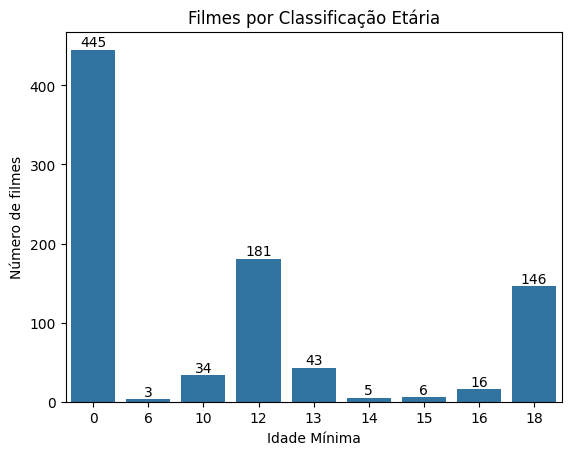

In [31]:
age_rating_counts = df['Age_Rating'].value_counts().reset_index()
age_rating_counts.columns = ["Age_Rating", "count"]

ax = sns.barplot(data=age_rating_counts, x="Age_Rating", y="count")

for container in ax.containers:
    ax.bar_label(container)

plt.ylabel("Número de filmes")
plt.xlabel("Idade Mínima")
plt.title("Filmes por Classificação Etária")
plt.show()

## Runtime (Tempo de Duração)

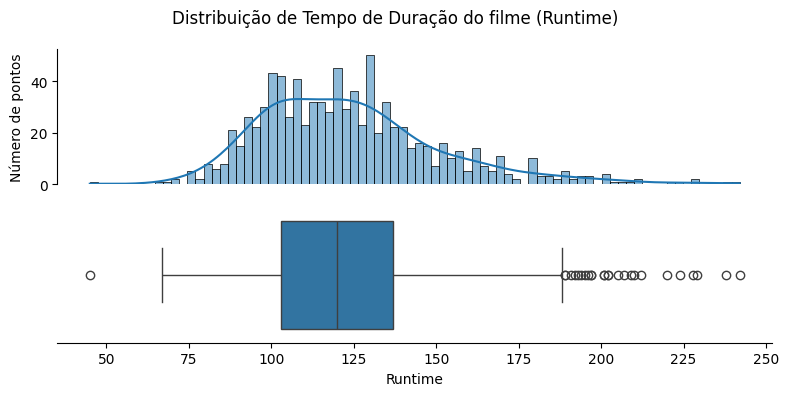

In [32]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8, 4), sharex=True)
axes = axes.flatten()

# Título
fig.suptitle('Distribuição de Tempo de Duração do filme (Runtime)', fontsize=12)

# Histograma superior
sns.histplot(data=df, x="Runtime", kde=True, bins=80, ax=axes[0])

# Tirando elementos da imagem
sns.despine(ax=axes[0])
sns.despine(ax=axes[0], bottom=True)
axes[0].tick_params(axis='x', bottom=False, labelbottom=False)
axes[0].set_ylabel('Número de pontos')

# Boxplot inferior
sns.boxplot(data=df, x="Runtime", ax=axes[1])

# Tirando elementos da imagem
sns.despine(ax=axes[1], left=True)
axes[1].tick_params(axis='y', left=False, labelleft=False)

plt.tight_layout()
plt.show()

In [33]:
df[df['Runtime'] > 220]

,Series_Title,Released_Year,Age_Rating,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,tmdb_id,imdb_id
71,Once Upon a Time in America,1984,0,229,"Crime, Drama",8.4,A former Prohibition-era Jewish gangster retur...,75.0,Sergio Leone,Robert De Niro,James Woods,Elizabeth McGovern,Treat Williams,311365,5321508.0,311,tt0087843
116,Lawrence of Arabia,1962,0,228,"Adventure, Biography, Drama",8.3,"The story of T.E. Lawrence, the English office...",100.0,David Lean,Peter O'Toole,Alec Guinness,Anthony Quinn,Jack Hawkins,268085,44824144.0,947,tt0056172
247,Lagaan: Once Upon a Time in India,2001,0,224,"Adventure, Drama, Musical",8.1,The people of a small village in Victorian Ind...,84.0,Ashutosh Gowariker,Aamir Khan,Raghuvir Yadav,Gracy Singh,Rachel Shelley,105036,70147.0,19666,tt0169102
314,Gone with the Wind,1939,0,238,"Drama, History, Romance",8.1,A manipulative woman and a roguish man conduct...,97.0,Victor Fleming,George Cukor,Sam Wood,Clark Gable,Vivien Leigh,290074,198676459.0,770,tt0031381
812,Hamlet,1996,13,242,Drama,7.7,"Hamlet, Prince of Denmark, returns home to fin...",77.0,Kenneth Branagh,Kenneth Branagh,Julie Christie,Derek Jacobi,Kate Winslet,35991,4414535.0,10549,tt0116477


## Genre (Gênero)

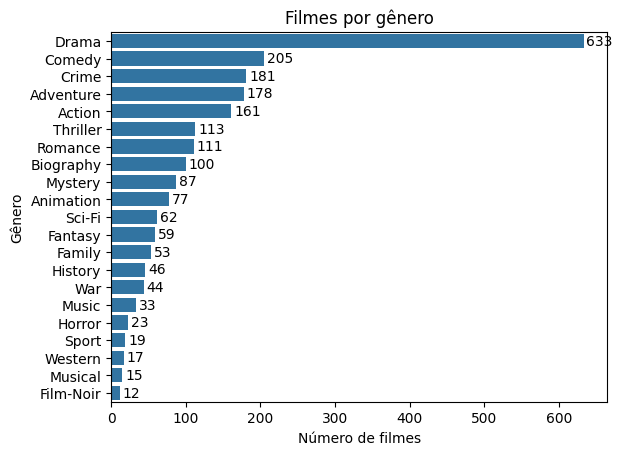

In [34]:
df_exploded = df["Genre"].str.split(",").explode().str.strip()

genre_counts = df_exploded.value_counts().reset_index()

ax = sns.barplot(genre_counts, y=genre_counts['Genre'], x=genre_counts['count'])

# adiciona os valores nas barras
for container in ax.containers:
    ax.bar_label(container, label_type="edge", padding=2)

plt.ylabel("Gênero")
plt.xlabel("Número de filmes")
plt.title("Filmes por gênero")
plt.show()

## IMDB_Rating (Avaliação IMDB)

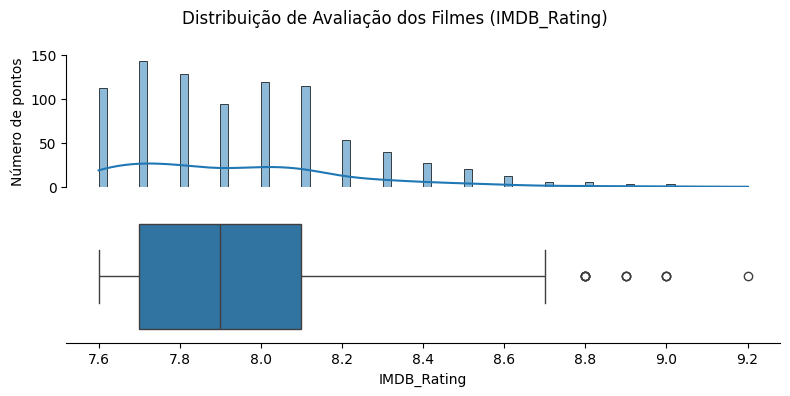

In [35]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8, 4), sharex=True)
axes = axes.flatten()

# Título
fig.suptitle('Distribuição de Avaliação dos Filmes (IMDB_Rating)', fontsize=12)

# Histograma superior
sns.histplot(data=df, x="IMDB_Rating", kde=True, bins=80, ax=axes[0])

# Tirando elementos da imagem
sns.despine(ax=axes[0])
sns.despine(ax=axes[0], bottom=True)
axes[0].tick_params(axis='x', bottom=False, labelbottom=False)
axes[0].set_ylabel('Número de pontos')

# Boxplot inferior
sns.boxplot(data=df, x="IMDB_Rating", ax=axes[1])

# Tirando elementos da imagem
sns.despine(ax=axes[1], left=True)
axes[1].tick_params(axis='y', left=False, labelleft=False)

plt.tight_layout()
plt.show()

In [36]:
df[df['IMDB_Rating'] >= 9.0]

,Series_Title,Released_Year,Age_Rating,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,tmdb_id,imdb_id
1,The Godfather,1972,0,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,238,tt0068646
2,The Dark Knight,2008,12,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,155,tt0468569
3,The Godfather: Part II,1974,0,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,240,tt0071562
4,12 Angry Men,1957,0,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,389,tt0050083


## Overview (Descrição curta do filme)

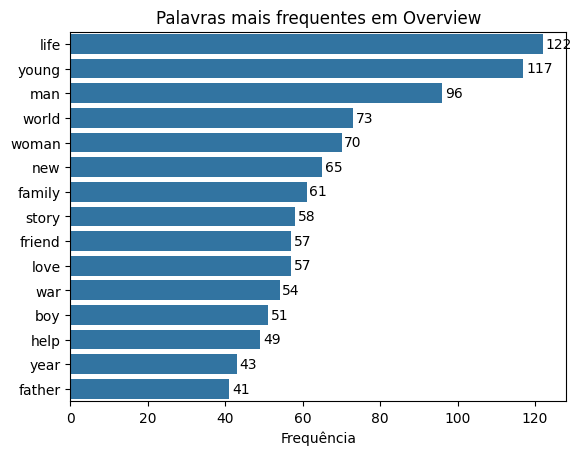

In [37]:
# Carregando a lista original de stopwords em inglês do nltk
stopwords_base = set(stopwords.words('english')) # o set otimiza o processo

# Adicionando algumas palavras extras após visualização dos primeiros resultados
palavras_adicionais = {'must', 'one', 'two', 'becomes', 'find', 'finds'}

# Combinando os dois conjuntos
stopwords_custom = stopwords_base.union(palavras_adicionais)

word_freq_dict = word_freq(df['Overview'], stopwords_custom)
# Vendo as palavras mais encontradas
overview_counts = pd.DataFrame({'Contagem': word_freq_dict})
overview_counts_top = overview_counts.head(15)

## Plot do gráfico
ax = sns.barplot(overview_counts_top, y=overview_counts_top.index, x='Contagem')

# Adicionando os valores nas barras
for container in ax.containers:
    ax.bar_label(container, padding=2)

plt.ylabel("")
plt.xlabel("Frequência")
plt.title("Palavras mais frequentes em Overview")
plt.show()

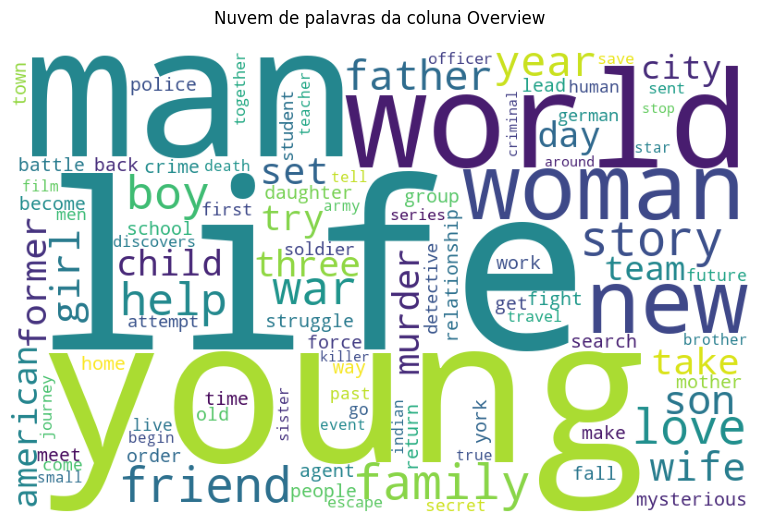

In [38]:
wordcloud = WordCloud(width=800, height=500, background_color='white', max_words=100).generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Nuvem de palavras da coluna Overview", pad=20)
plt.show()

In [39]:
media_palavras_por_overview = get_word_count_average(df['Overview'], stopwords_custom).mean()

print(f"Cada filme tem em média {media_palavras_por_overview:.0f} palavras (ignorando as stopwords) em sua descrição (Overview).")

Cada filme tem em média 14 palavras (ignorando as stopwords) em sua descrição (Overview).


### Pergunta: É possível inferir o gênero do filme a partir dessa coluna?

Sim, é possível. Muito comumente estas descrições trazem palavras chaves específicas que logo nos remetem a um gênero ou outro. Ou até o sentindo inteiro da frase.

Exemplo:

- Título: The Godfather <br>
- Overview: An organized <span style="color: red;">crime</span> dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son. <br>
- Gênero: Crime, Drama

Com Redes Neurais é possível treinar modelos para fazerem estas inferências. Porém é necessária uma grande quantidade de dados. Neste dataset acredito não ser possível treinar um modelo eficiente. O ideal seria buscar um modelo treinado de plataformas como a Hugging Face e utilizar ele já treinado para prever os gêneros destes filmes.

## Meta_score (Nota do Metacritic)

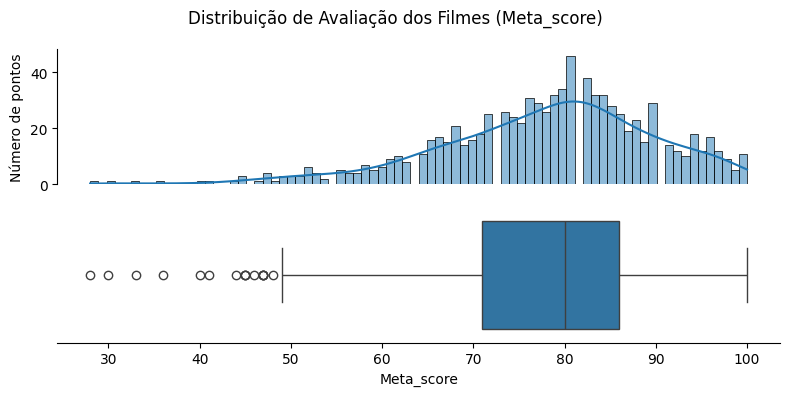

In [40]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8, 4), sharex=True)
axes = axes.flatten()

# Título
fig.suptitle('Distribuição de Avaliação dos Filmes (Meta_score)', fontsize=12)

# Histograma superior
sns.histplot(data=df, x="Meta_score", kde=True, bins=80, ax=axes[0])

# Tirando elementos da imagem
sns.despine(ax=axes[0])
sns.despine(ax=axes[0], bottom=True)
axes[0].tick_params(axis='x', bottom=False, labelbottom=False)
axes[0].set_ylabel('Número de pontos')

# Boxplot inferior
sns.boxplot(data=df, x="Meta_score", ax=axes[1])

# Tirando elementos da imagem
sns.despine(ax=axes[1], left=True)
axes[1].tick_params(axis='y', left=False, labelleft=False)

plt.tight_layout()
plt.show()

In [41]:
df[df['Meta_score'] <= 40]

,Series_Title,Released_Year,Age_Rating,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,tmdb_id,imdb_id
356,Tropa de Elite,2007,18,115,"Action, Crime, Drama",8.0,"In 1997 Rio de Janeiro, Captain Nascimento has...",33.0,José Padilha,Wagner Moura,André Ramiro,Caio Junqueira,Milhem Cortaz,98097,8060.0,7347,tt0861739
735,Kai po che!,2013,0,130,"Drama, Sport",7.7,Three friends growing up in India at the turn ...,40.0,Abhishek Kapoor,Amit Sadh,Sushant Singh Rajput,Rajkummar Rao,Amrita Puri,32628,1122527.0,168245,tt2213054
788,I Am Sam,2001,13,132,Drama,7.7,A mentally handicapped man fights for custody ...,28.0,Jessie Nelson,Sean Penn,Michelle Pfeiffer,Dakota Fanning,Dianne Wiest,142863,40311852.0,10950,tt0277027
917,Seven Pounds,2008,12,123,Drama,7.6,A man with a fateful secret embarks on an extr...,36.0,Gabriele Muccino,Will Smith,Rosario Dawson,Woody Harrelson,Michael Ealy,286770,69951824.0,11321,tt0814314
942,The Butterfly Effect,2004,0,113,"Drama, Sci-Fi, Thriller",7.6,Evan Treborn suffers blackouts during signific...,30.0,Eric Bress,J. Mackye Gruber,Ashton Kutcher,Amy Smart,Melora Walters,451479,57938693.0,1954,tt0289879


## Director

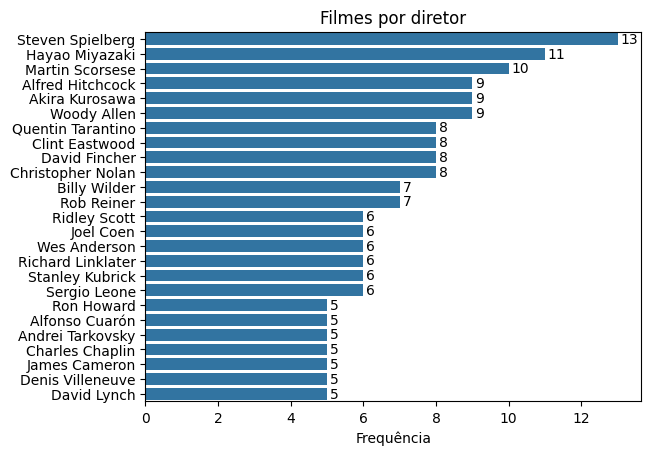

In [42]:
director_counts = df['Director'].value_counts().reset_index().head(25)

ax = sns.barplot(director_counts, y=director_counts['Director'], x=director_counts['count'])

# Adiciona os valores nas barras
for container in ax.containers:
    ax.bar_label(container, padding=2)

plt.ylabel("")
plt.xlabel("Frequência")
plt.title("Filmes por diretor")
plt.show()

## Star1, Star2, Star3, Star4 (Atores)

 Número de atores existentes na database: 2396


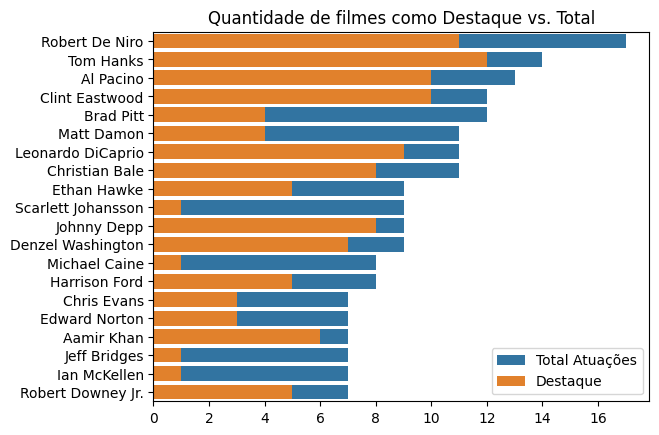

In [43]:
# Calculando o número de vezes que cada ator aparece como Star1, ou ator principal
main_character_counts = df['Star1'].value_counts().reset_index().rename(columns={'Star1': 'Actor'})
main_character_counts_top = ((df['Star1'].value_counts().reset_index()).copy()).head(25)

# Calculando quantos filmes cada ator aparece nas posições 1 a 4
casting = df.melt(
    id_vars=["Series_Title"], 
    value_vars=["Star1", "Star2", "Star3", "Star4"],
    value_name="Actor"
)["Actor"]

total_casting_counts = casting.value_counts().reset_index()

# Printando número de atores únicos
print(f" Número de atores existentes na database: {casting.nunique()}")

# Fazendo merge nas duas contagens: ator principal ou ator 1 a 4
actors_count = pd.merge(main_character_counts, total_casting_counts, on='Actor', suffixes=['_main', '_total'])
actors_count_top = actors_count.sort_values(ascending=False, by='count_total').head(20) # pegando os primeiros ao ordenar por número de filmes totais, facilitando visibilidade do gráfico

# Plot do gráfico
bar1 = sns.barplot(y='Actor',  x='count_total', data=actors_count_top[['Actor', 'count_total']], label='Total Atuações')
bar2 = sns.barplot(y='Actor', x='count_main', data=actors_count_top[['Actor', 'count_main']], label='Destaque')

plt.legend()
plt.title("Quantidade de filmes como Destaque vs. Total")
plt.xlabel("")
plt.ylabel("")
plt.show()

# ------------- Observações: ----------------------------------
# Tecnicamente, um ator pode ter aparecido em filmes que estão na database, mas a partir da posição 4. O que faz com que eles não apareçam.
# Star1 pode-se considerar ator principal, Star2 a 4 não pode-se dizer que não é uma posição de ator principal, pois os filmes podem ter mais de um ator principal, por isso nomeei aqui Star1 como Ator em Destaque

# Manter estas observações em mente

No gráfico acima pode-se ver que atores como Tom Hanks, Johnny Depp são majoritariamente escalados como destaques nos filmes que participam. Já Scarlett Johansson e Jeff Bridges raramente aparecem nessa posição.

## No_of_Votes (Número)

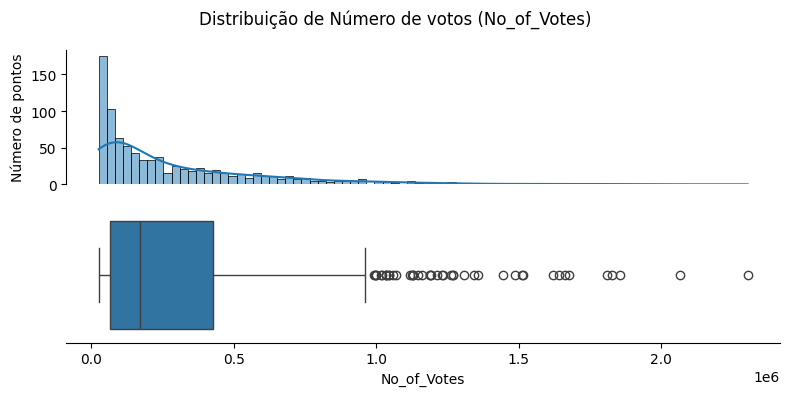

In [44]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8, 4), sharex=True)
axes = axes.flatten()

# Título
fig.suptitle('Distribuição de Número de votos (No_of_Votes)', fontsize=12)

# Histograma superior
sns.histplot(data=df, x="No_of_Votes", kde=True, bins=80, ax=axes[0])

# Tirando elementos da imagem
sns.despine(ax=axes[0])
sns.despine(ax=axes[0], bottom=True)
axes[0].tick_params(axis='x', bottom=False, labelbottom=False)
axes[0].set_ylabel('Número de pontos')

# Boxplot inferior
sns.boxplot(data=df, x="No_of_Votes", ax=axes[1])

# Tirando elementos da imagem
sns.despine(ax=axes[1], left=True)
axes[1].tick_params(axis='y', left=False, labelleft=False)

plt.tight_layout()
plt.show()

## Gross (Bilheteria)

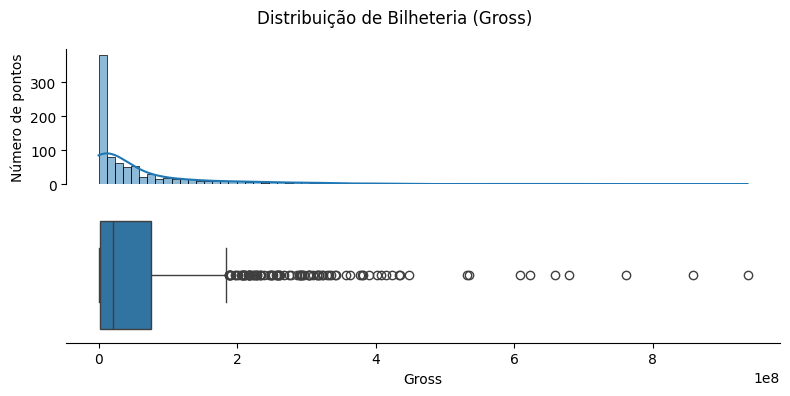

In [45]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8, 4), sharex=True)
axes = axes.flatten()

# Título
fig.suptitle('Distribuição de Bilheteria (Gross)', fontsize=12)

# Histograma superior
sns.histplot(data=df, x="Gross", kde=True, bins=80, ax=axes[0])

# Tirando elementos da imagem
sns.despine(ax=axes[0])
sns.despine(ax=axes[0], bottom=True)
axes[0].tick_params(axis='x', bottom=False, labelbottom=False)
axes[0].set_ylabel('Número de pontos')

# Boxplot inferior
sns.boxplot(data=df, x="Gross", ax=axes[1])

# Tirando elementos da imagem
sns.despine(ax=axes[1], left=True)
axes[1].tick_params(axis='y', left=False, labelleft=False)

plt.tight_layout()
plt.show()

```Gross``` tem uma grande quantidade de outliers.

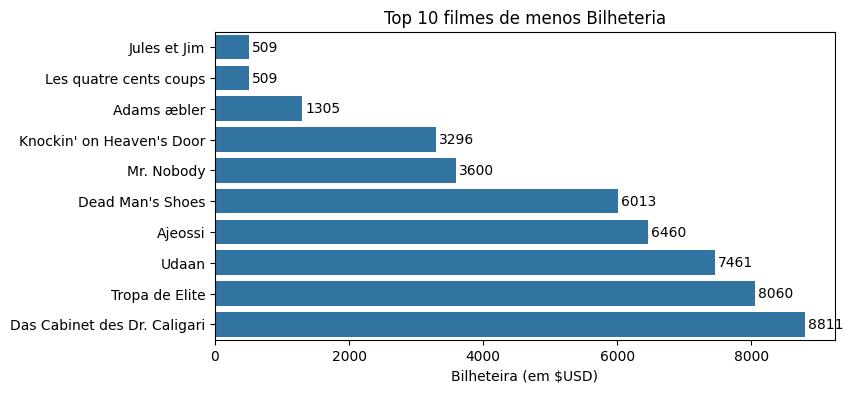

In [46]:
##  Top 10 filmes de menor bilheteria
lowest_gross_movies_top10 = df.sort_values(by='Gross').head(10)

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(data=lowest_gross_movies_top10, x='Gross', y='Series_Title', ax=ax, legend=False)

# Adiciona os valores nas barras
for container in ax.containers:
    ax.bar_label(container, padding=2)

plt.ylabel("")
plt.xlabel("Bilheteira (em $USD)")
plt.title("Top 10 filmes de menos Bilheteria")
plt.show()

Pareando os dados do site Box Office Mojo com ```Gross```, concluí que esta coluna traz valores de Domestic Box Office, ou seja, bilheteria nos EUA. Alguns filmes não foram produzidos originalmente nos Estados Unidos, como Tropa de Elite, que traz um Domestic Box Office de apenas $USD 8.744,00, comparado ao Internacional de $USD 14.750.404,00 (Fonte: https://www.boxofficemojo.com/title/tt0861739/?ref_=bo_rl_ti).

Também pode-se ver que a maioria dos nomes não está em inglês, sugerindo que também não são de origem de um país de língua inglesa, como os EUA.

### Inflação

É possível calcular a bilheteria dos filmes mais antigos utilizando os dados de inflação de https://www.macrotrends.net/2497/historical-inflation-rate-by-year.

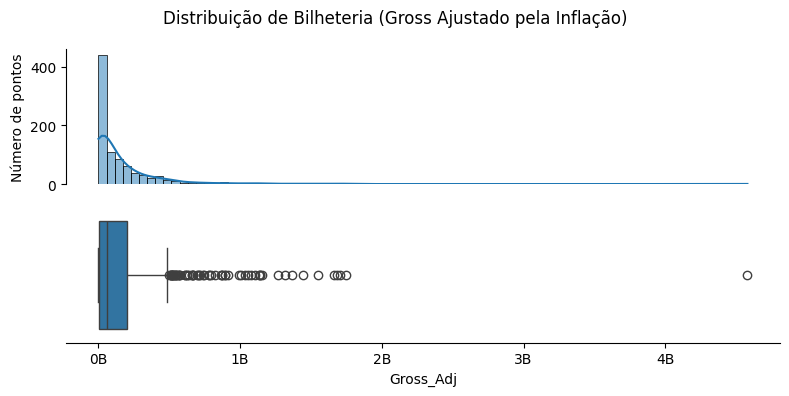

In [47]:
# Carregando base de dados de inflação
cpi = pd.read_csv("data/US_inflation_from_macrotrends.csv", sep=';')

# Transformações iniciais
cpi["Date"] = pd.to_datetime(cpi["Date"])
cpi["Year"] = cpi["Date"].dt.year
cpi["Value"] = cpi["Value"].str.replace(',', '.').astype(float)

# A base está em mes, agrupando pra ano
cpi_yearly = cpi.groupby("Year")["Value"].mean().reset_index()
cpi_yearly.rename(columns={"Value": "CPI_Annual", "Year": "Released_Year"}, inplace=True)

# Unindo os dois dataframes
df = df.merge(cpi_yearly, on="Released_Year", how="left")
cpi_base = cpi_yearly.loc[cpi_yearly["Released_Year"] == 2025, "CPI_Annual"].values[0]
df["Gross_Adj"] = df["Gross"] * (cpi_base / df["CPI_Annual"])

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8, 4), sharex=True)
axes = axes.flatten()

# Título
fig.suptitle('Distribuição de Bilheteria (Gross Ajustado pela Inflação)', fontsize=12)

# Histograma superior
sns.histplot(data=df, x="Gross_Adj", kde=True, bins=80, ax=axes[0])

# Tirando elementos da imagem
sns.despine(ax=axes[0])
sns.despine(ax=axes[0], bottom=True)
axes[0].tick_params(axis='x', bottom=False, labelbottom=False)
axes[0].set_ylabel('Número de pontos')

# Boxplot inferior
sns.boxplot(data=df, x="Gross_Adj", ax=axes[1])

# Tirando elementos da imagem
sns.despine(ax=axes[1], left=True)
axes[1].tick_params(axis='y', left=False, labelleft=False)
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(to_bils(0)))

plt.tight_layout()
plt.show()

In [48]:
df[df['Gross_Adj'] >= 4*1e9]

,Series_Title,Released_Year,Age_Rating,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,tmdb_id,imdb_id,CPI_Annual,Gross_Adj
276,Gone with the Wind,1939,0,238,"Drama, History, Romance",8.1,A manipulative woman and a roguish man conduct...,97.0,Victor Fleming,George Cukor,Sam Wood,Clark Gable,Vivien Leigh,290074,198676459.0,770,tt0031381,13.908333,4.580128e+09


Ajustado na inflação de 2025, o filme Gone with the Wind teria arrecadado 4.5 bilhões de dólares!

Obs.: Pesquisando um pouco mais a fundo, descobri que os valores de Box Office adicionam relançamentos, ou seja, o Gross de 198676459.0 de Gone With the Wind não foi totalmente feito em 1939. Uma técnica mais apurada para comparar os filmes seria:

$ Gross_{apurado} = (N_{release} * P_{release}) + (N_{re-release1} * P_{re-release1}) + ... $

Onde N é o número de ingressos e P o preço do ingresso na data de lançamento. Ainda assim, segundo o Box Office Mojo ([How are grosses adjusted for ticket price inflation?](https://help.imdb.com/article/imdbpro/industry-research/box-office-mojo-by-imdbpro-faq/GCWTV4MQKGWRAUAP#)), esses tipos de estudos ajustados tem outros fatores e acaba sendo uma forma de obter uma ideia geral de comparação entre filmes.

# Interações entre Colunas (WIP)

In [49]:
sns.set_style("white")
plt.style.use('seaborn-v0_8')

# Colunas auxiliares para análises posteriores
df['Meta_score_1a10'] = df['Meta_score']/10
df['Decade'] = df['Released_Year']//10*10

# Combinar Genre e Actors em listas
df['Genre_list'] = df['Genre'].apply(lambda x: [g.strip() for g in x.split(',')])
df['Actors_list'] = df[['Star1', 'Star2', 'Star3', 'Star4']].values.tolist()

# Explodir as linhas de Genre e Actors
df_exploded_genre = df.explode(['Genre_list']).drop(columns=['Genre']).copy()
df_exploded_actors = df.explode(['Actors_list']).drop(columns=['Star1', 'Star2', 'Star3', 'Star4']).copy()

## Gross

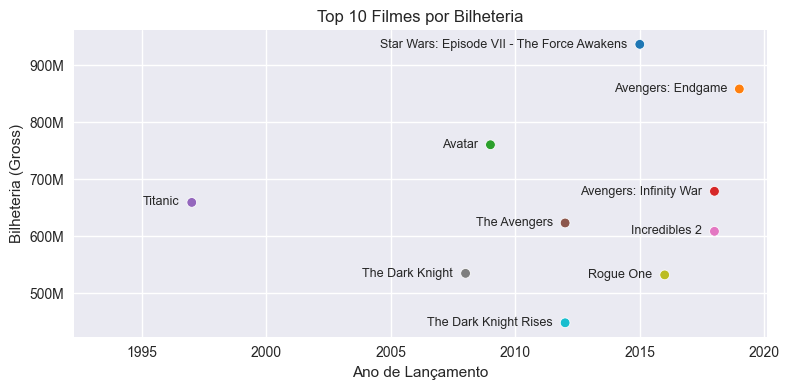

In [50]:
##  Top 10 filmes de maior bilheteria
highest_gross_movies_top10 = df.sort_values(by='Gross', ascending=False).head(10)

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(8, 4))

sns.scatterplot(data=highest_gross_movies_top10, y='Gross', x='Released_Year', hue= 'Series_Title', palette='tab10', ax=ax, legend=False)

# Nome dos filmes do lado
for index, row in highest_gross_movies_top10.iterrows():
    ax.text(x=row['Released_Year'] - 0.5, y=row['Gross'], s=row['Series_Title'], ha='right', va='center', fontsize=9)

# Contornar o overflow dos nomes
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin - ((xmax - xmin) * 0.15), xmax)

ax.set_title('Top 10 Filmes por Bilheteria', fontsize=12)
ax.set_xlabel('Ano de Lançamento')
ax.set_ylabel('Bilheteria (Gross)')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(to_mils(0)))

plt.tight_layout()
plt.show()

- Titanic é o único filme entre estes 10 que foi lançado antes de 2005.

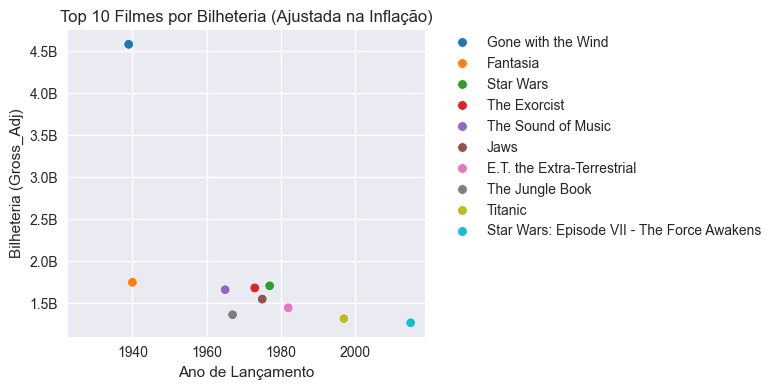

In [51]:
##  Top 10 filmes de maior bilheteria
highest_gross_adj_movies_top10 = df.sort_values(by='Gross_Adj', ascending=False).head(10)

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(8, 4))

sns.scatterplot(data=highest_gross_adj_movies_top10, y='Gross_Adj', x='Released_Year', hue= 'Series_Title', palette='tab10', ax=ax)

# Contornar o overflow dos nomes
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin - ((xmax - xmin) * 0.15), xmax)

ax.set_title('Top 10 Filmes por Bilheteria (Ajustada na Inflação)', fontsize=12)
ax.set_xlabel('Ano de Lançamento')
ax.set_ylabel('Bilheteria (Gross_Adj)')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(to_bils(1)))

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

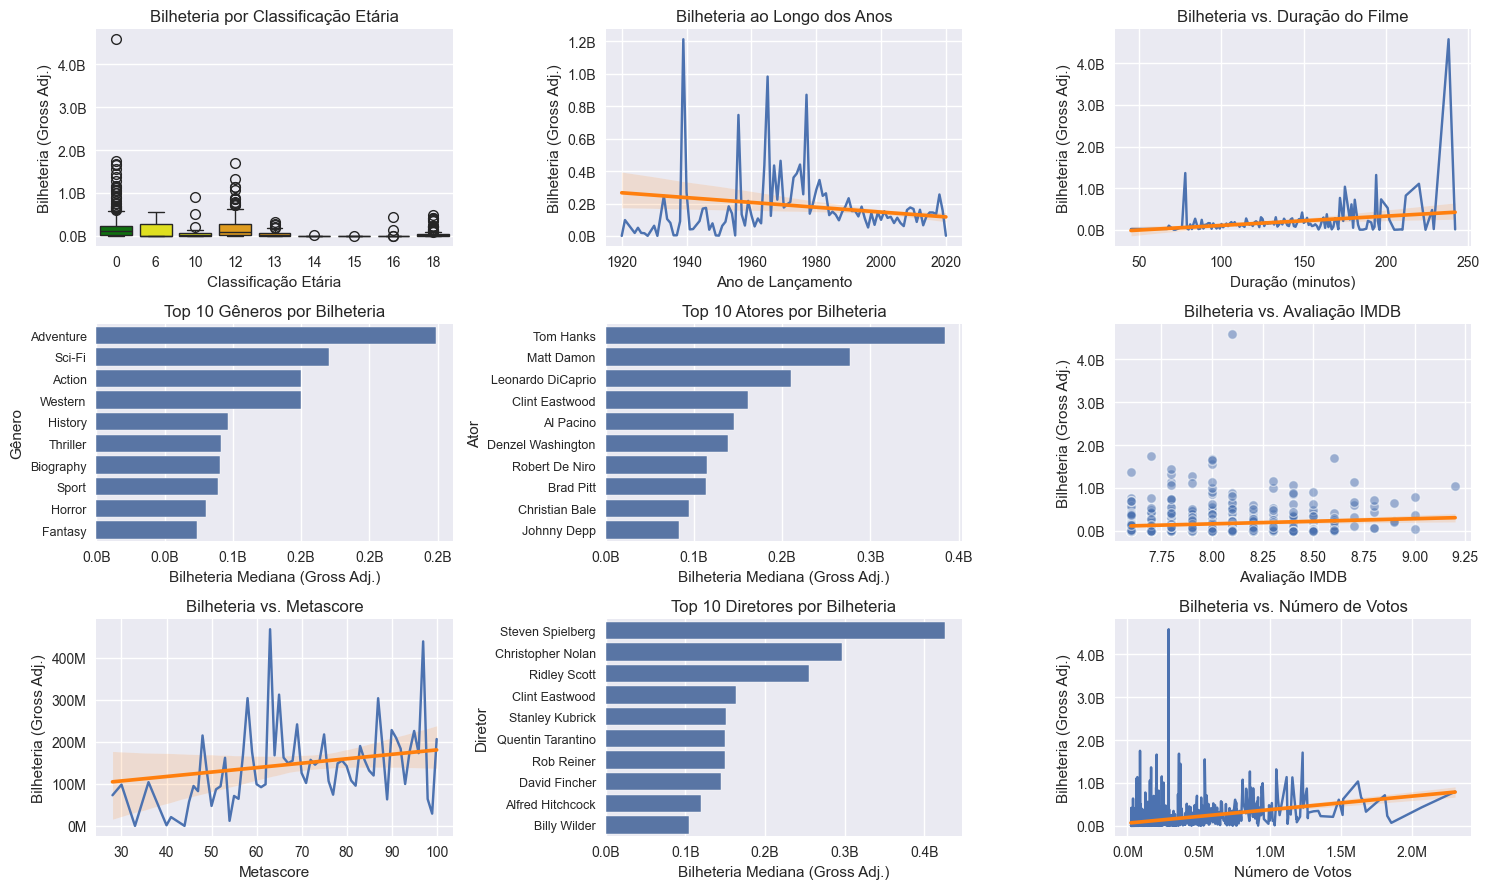

In [52]:
# Configuração inicial dos subplots e do estilo do gráfico
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 9))
axes = axes.flatten()

# Relação entre a Classificação Etária e a Bilheteria (Gross Adj.)
# O parâmetro 'hue' e a paleta personalizada são usados para colorir as caixas
age_rating_palette = ['green', 'yellow', 'yellow', 'orange', 'orange', 'orange', 'orange', 'red', '#696969']

sns.boxplot(df, x='Age_Rating', hue='Age_Rating', y='Gross_Adj', legend=False, ax=axes[0], palette=age_rating_palette)
axes[0].set_title('Bilheteria por Classificação Etária', fontsize=12)
axes[0].set_xlabel('Classificação Etária')
axes[0].set_ylabel('Bilheteria (Gross Adj.)')
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(to_bils(1)))

# Relação entre o Ano de Lançamento e a Bilheteria (Gross Adj.)
sns.lineplot(df, x='Released_Year', y='Gross_Adj', ax=axes[1], errorbar=None)
sns.regplot(df, x='Released_Year', y='Gross_Adj', ax=axes[1], scatter=False, color='#ff7f0e')
axes[1].set_title('Bilheteria ao Longo dos Anos', fontsize=12)
axes[1].set_xlabel('Ano de Lançamento')
axes[1].set_ylabel('Bilheteria (Gross Adj.)')
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(to_bils(1)))

# Relação entre a Duração (Runtime) e a Bilheteria (Gross Adj.)
sns.lineplot(df, x='Runtime', y='Gross_Adj', ax=axes[2], errorbar=None)
sns.regplot(df, x='Runtime', y='Gross_Adj', ax=axes[2], scatter=False, color='#ff7f0e')
axes[2].set_title('Bilheteria vs. Duração do Filme', fontsize=12)
axes[2].set_xlabel('Duração (minutos)')
axes[2].set_ylabel('Bilheteria (Gross Adj.)')
axes[2].yaxis.set_major_formatter(ticker.FuncFormatter(to_bils(1)))

# Bilheteria por Gênero (Top 10)
# Agregado por mediana para evitar outliers, como visto anteriormente.
sns.barplot(df_exploded_genre[['Genre_list', 'Gross_Adj']].groupby('Genre_list').median().sort_values(by='Gross_Adj', ascending=False).head(10),
            x='Gross_Adj', y='Genre_list', ax=axes[3])
axes[3].set_title('Top 10 Gêneros por Bilheteria', fontsize=12)
axes[3].set_xlabel('Bilheteria Mediana (Gross Adj.)')
axes[3].set_ylabel('Gênero')
axes[3].tick_params(axis='y', labelsize=9)
axes[3].xaxis.set_major_formatter(ticker.FuncFormatter(to_bils(1)))

# Bilheteria por Atores (Top 10)
# Agregado por mediana para evitar outliers, como visto anteriormente.
# Limitado para atores com mais de 8 filmes atuados, evitando franquias
df_agg_actors = df_exploded_actors.groupby('Actors_list')['Gross_Adj'].agg(['median', 'count', 'mean'])
top_actors_bymedian = df_agg_actors[df_agg_actors['count'] > 8].sort_values(by='median', ascending=False).head(10)
sns.barplot(top_actors_bymedian, x='median', y=top_actors_bymedian.index, ax=axes[4])
axes[4].set_title('Top 10 Atores por Bilheteria', fontsize=12)
axes[4].set_xlabel('Bilheteria Mediana (Gross Adj.)')
axes[4].set_ylabel('Ator')
axes[4].tick_params(axis='y', labelsize=9)
axes[4].xaxis.set_major_formatter(ticker.FuncFormatter(to_bils(1)))

# Relação entre a Avaliação IMDB e a Bilheteria (Gross Adj.)
sns.regplot(df, x='IMDB_Rating', y='Gross_Adj', ax=axes[5], scatter_kws={'alpha': 0.5, 'edgecolor': 'white', 'linewidths': 1}, line_kws={'color': '#ff7f0e'})
axes[5].set_title('Bilheteria vs. Avaliação IMDB', fontsize=12)
axes[5].set_xlabel('Avaliação IMDB')
axes[5].set_ylabel('Bilheteria (Gross Adj.)')
axes[5].yaxis.set_major_formatter(ticker.FuncFormatter(to_bils(1)))

# Relação entre o Metascore e a Bilheteria (Gross Adj.)
sns.lineplot(df, x='Meta_score', y='Gross_Adj', ax=axes[6], errorbar=None)
sns.regplot(df, x='Meta_score', y='Gross_Adj', ax=axes[6], scatter=False, color='#ff7f0e')
axes[6].set_title('Bilheteria vs. Metascore', fontsize=12)
axes[6].set_xlabel('Metascore')
axes[6].set_ylabel('Bilheteria (Gross Adj.)')
axes[6].yaxis.set_major_formatter(ticker.FuncFormatter(to_mils(0)))

# Bilheteria por Diretores (Top 10)
# Agregado por mediana para evitar outliers, como visto anteriormente.
# Limitado para diretores com mais de 5 filmes dirigidos, evitando franquias
df_agg_directors = df[['Director', 'Gross_Adj']].groupby('Director')['Gross_Adj'].agg(['median', 'count', 'mean'])
top_directors_bymedian = df_agg_directors[df_agg_directors['count'] > 5].sort_values(by='median', ascending=False).head(10)
sns.barplot(top_directors_bymedian, x='median', y=top_directors_bymedian.index, ax=axes[7])
axes[7].set_title('Top 10 Diretores por Bilheteria', fontsize=12)
axes[7].set_xlabel('Bilheteria Mediana (Gross Adj.)')
axes[7].set_ylabel('Diretor')
axes[7].tick_params(axis='y', labelsize=9)
axes[7].xaxis.set_major_formatter(ticker.FuncFormatter(to_bils(1)))

# Relação entre o Número de Votos e a Bilheteria (Gross Adj.)
sns.lineplot(df, x='No_of_Votes', y='Gross_Adj', ax=axes[8], errorbar=None)
sns.regplot(df, x='No_of_Votes', y='Gross_Adj', ax=axes[8], scatter=False, color='#ff7f0e')
axes[8].set_title('Bilheteria vs. Número de Votos', fontsize=12)
axes[8].set_xlabel('Número de Votos')
axes[8].set_ylabel('Bilheteria (Gross Adj.)')
axes[8].xaxis.set_major_formatter(ticker.FuncFormatter(to_mils(1)))
axes[8].yaxis.set_major_formatter(ticker.FuncFormatter(to_bils(1)))

plt.tight_layout()
plt.show()

Observações ```Gross vs.```:
- ```Age_Rating```: Os filmes de classificação etária mínima de 12 anos tendem a faturar mais.

- ```Released_Year```: As bilheterias têm crescido com o passar dos anos, sendo um fator relativamente confiável (baixo intervalo de incerteza na linha de tendência) para entender a expectativa de faturamento de um filme.

- ```Runtime```: O tempo de duração também pode ser considerado como um fator para aumento da expectativa de faturamento, ainda que tímido.

- ```Genre```: Os gêneros de Aventura, Ficção Científica e Ação tendem a arrecadar maiores bilheterias.

- ```Star[1-4]```: Tom Hanks, Matt Damon e Leonardo DiCaprio têm um espaço significante de bilheteria mediana com relação aos demais atores.

- ```Meta_score```: Curiosamente, apresenta uma tendência negativa. A aparência do gráfico e o intervalo de incerteza da tendência aponta para dados inconclusivos.

- ```Meta_score```: As duas métricas de agregação de votos, apesar de demonstrarem uma tendência com relação ao faturamento, têm índice de incerteza alto, o que não traz uma boa confiança de resultado.

- ```Director```: Filmes dirigidos por Christopher Nolan e Steven Spielberg tendem a estar na ponta dos rankings de Box Office.

- ```No_of_Votes```: Por fim, películas com maior número de votos têm uma tendência a obter maiores rendas brutas.

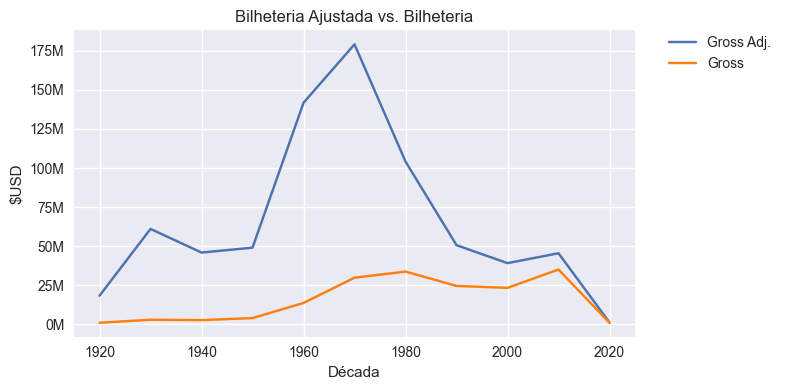

In [53]:
## Agregação de Bilheteria por década (mediana para evitar outliers)
decade_gross = df[['Decade', 'Gross', 'Gross_Adj']].groupby('Decade').median()

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(8, 4))

sns.lineplot(x=decade_gross.index, y=decade_gross['Gross_Adj'], ax=ax, label='Gross Adj.')
sns.lineplot(x=decade_gross.index, y=decade_gross['Gross'], ax=ax, label='Gross', color='#ff7f0e')

ax.set_title('Bilheteria Ajustada vs. Bilheteria', fontsize=12)
ax.set_xlabel('Década')
ax.set_ylabel('$USD')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(to_mils(0)))

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

Aqui podemos ver como a inflação causa uma variação nos valores de bilheteria. No espaço ajustado, o pico de bilheteria dos cinemas foi na década de 1970.

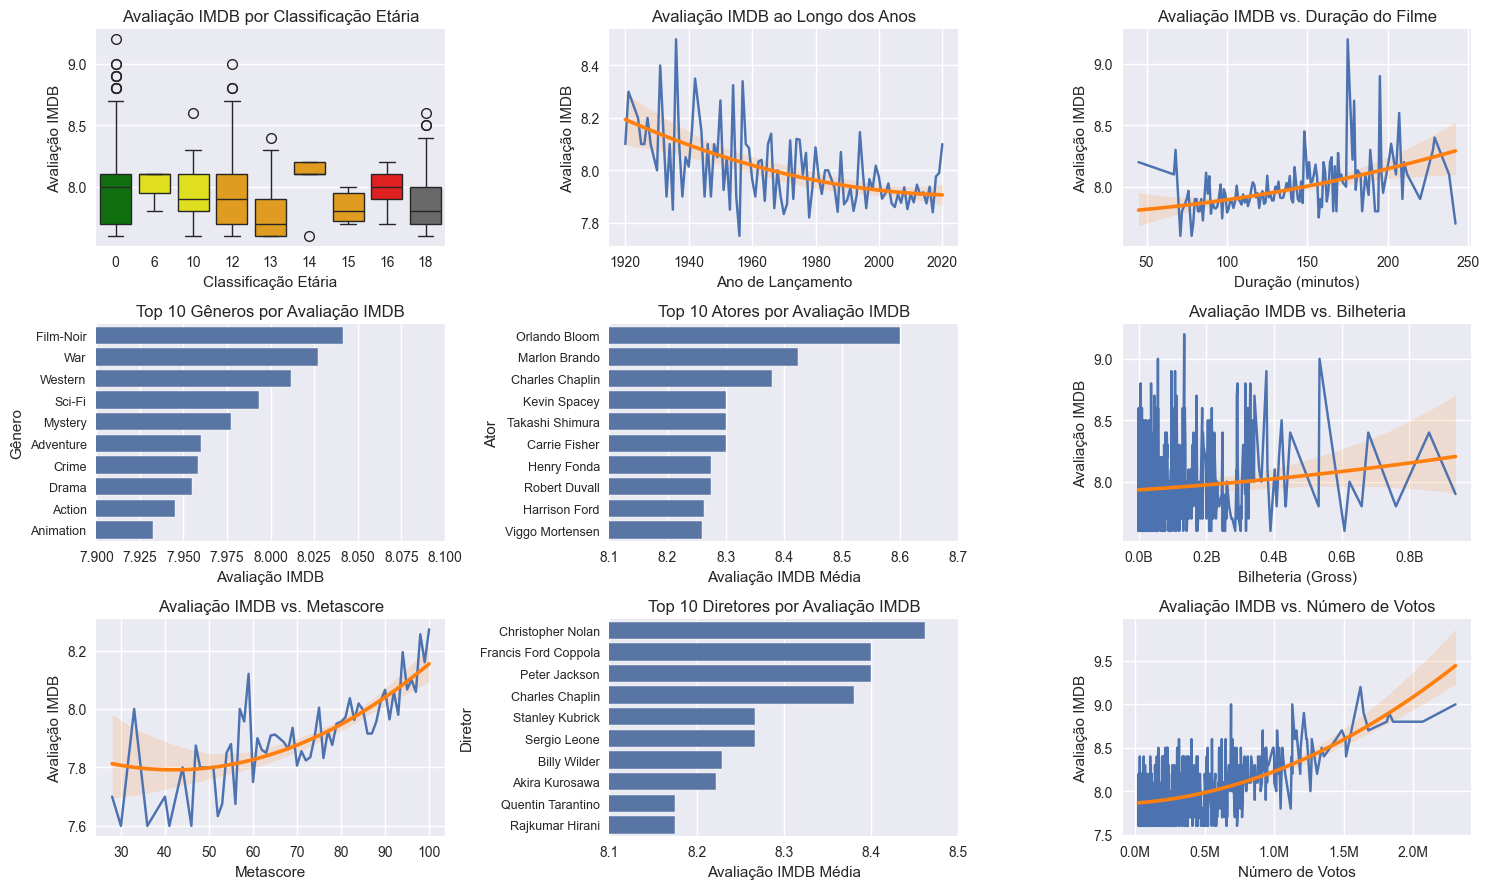

In [54]:
# Configuração inicial dos subplots para os 9 gráficos
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 9))
axes = axes.flatten()

# Relação entre a Classificação Etária e a Avaliação IMDB
sns.boxplot(df, x='Age_Rating', hue='Age_Rating', y='IMDB_Rating', ax=axes[0], legend=False, palette=age_rating_palette)
axes[0].set_title('Avaliação IMDB por Classificação Etária', fontsize=12)
axes[0].set_xlabel('Classificação Etária')
axes[0].set_ylabel('Avaliação IMDB')

# Relação entre o Ano de Lançamento e a Avaliação IMDB
sns.lineplot(df, x='Released_Year', y='IMDB_Rating', ax=axes[1], errorbar=None)
sns.regplot(df, x='Released_Year', y='IMDB_Rating', ax=axes[1], scatter=False, order=2, color='#ff7f0e')
axes[1].set_title('Avaliação IMDB ao Longo dos Anos', fontsize=12)
axes[1].set_xlabel('Ano de Lançamento')
axes[1].set_ylabel('Avaliação IMDB')

# Relação entre a Duração (Runtime) e a Avaliação IMDB
sns.lineplot(df, x='Runtime', y='IMDB_Rating', ax=axes[2], errorbar=None)
sns.regplot(df, x='Runtime', y='IMDB_Rating', ax=axes[2], scatter=False, order=2, color='#ff7f0e')
axes[2].set_title('Avaliação IMDB vs. Duração do Filme', fontsize=12)
axes[2].set_xlabel('Duração (minutos)')
axes[2].set_ylabel('Avaliação IMDB')

# Avaliação IMDB por Gênero (Top 10)
sns.barplot(df_exploded_genre[['Genre_list', 'IMDB_Rating']].groupby('Genre_list').mean().sort_values(by='IMDB_Rating', ascending=False).head(10), x='IMDB_Rating', y='Genre_list', ax=axes[3])
axes[3].set_title('Top 10 Gêneros por Avaliação IMDB', fontsize=12)
axes[3].set_xlabel('Avaliação IMDB')
axes[3].set_ylabel('Gênero')
axes[3].tick_params(axis='y', labelsize=9)
axes[3].set_xlim(7.9, 8.1)

# Avaliação IMDB por Atores (Top 10)
# PS.: Atores com mais de 3 filmes para evitar outliers
df_agg_actors = df_exploded_actors.groupby('Actors_list')['IMDB_Rating'].agg(['median', 'count', 'mean'])
top_actors_bymean = df_agg_actors[df_agg_actors['count'] > 3].sort_values(by='mean', ascending=False).head(10)
sns.barplot(top_actors_bymean, x='mean', y=top_actors_bymean.index, ax=axes[4])
axes[4].set_title('Top 10 Atores por Avaliação IMDB', fontsize=12)
axes[4].set_xlabel('Avaliação IMDB Média')
axes[4].set_ylabel('Ator')
axes[4].tick_params(axis='y', labelsize=9)
axes[4].set_xlim(8.1, 8.7)

# Relação entre a Bilheteria (Gross) e a Avaliação IMDB
sns.lineplot(df, x='Gross', y='IMDB_Rating', ax=axes[5], errorbar=None)
sns.regplot(df, x='Gross', y='IMDB_Rating', ax=axes[5], scatter=False, order=2, color='#ff7f0e')
axes[5].set_title('Avaliação IMDB vs. Bilheteria', fontsize=12)
axes[5].set_xlabel('Bilheteria (Gross)')
axes[5].set_ylabel('Avaliação IMDB')
axes[5].xaxis.set_major_formatter(ticker.FuncFormatter(to_bils(1)))

# Relação entre o Metascore e Avaliação IMDB
sns.lineplot(df, x='Meta_score', y='IMDB_Rating', ax=axes[6], errorbar=None)
sns.regplot(df, x='Meta_score', y='IMDB_Rating', ax=axes[6], scatter=False, order=2, color='#ff7f0e')
axes[6].set_title('Avaliação IMDB vs. Metascore', fontsize=12)
axes[6].set_xlabel('Metascore')
axes[6].set_ylabel('Avaliação IMDB')

# Avaliação IMDB por Diretores (Top 10)
df_agg_directors = df[['Director', 'IMDB_Rating']].groupby('Director')['IMDB_Rating'].agg(['median', 'count', 'mean'])
top_directors_bymean = df_agg_directors[df_agg_directors['count'] > 3].sort_values(by='mean', ascending=False).head(10) # Seleciona diretores com mais de 3 filmes para evitar outliers
sns.barplot(top_directors_bymean, x='mean', y=top_directors_bymean.index, ax=axes[7])
axes[7].set_title('Top 10 Diretores por Avaliação IMDB', fontsize=12)
axes[7].set_xlabel('Avaliação IMDB Média')
axes[7].set_ylabel('Diretor')
axes[7].tick_params(axis='y', labelsize=9)
axes[7].set_xlim(8.1, 8.5)

# Relação entre o Número de Votos e a Avaliação IMDB
sns.lineplot(df, x='No_of_Votes', y='IMDB_Rating', ax=axes[8], errorbar=None)
sns.regplot(df, x='No_of_Votes', y='IMDB_Rating', ax=axes[8], scatter=False, order=2, color='#ff7f0e')
axes[8].set_title('Avaliação IMDB vs. Número de Votos', fontsize=12)
axes[8].set_xlabel('Número de Votos')
axes[8].set_ylabel('Avaliação IMDB')
axes[8].xaxis.set_major_formatter(ticker.FuncFormatter(to_mils(1)))

plt.tight_layout()
plt.show()

Observações:
- Gênero, Atores e Diretores não tendem a causar uma variação alta nas avaliações do IMDB.
- Pode-se observar com clareza como os outliers em ```Meta_score```, ```No_of_Votes```, ```Gross``` e ```Runtime``` aumentam o intervalo de incerteza na linha de tendência.

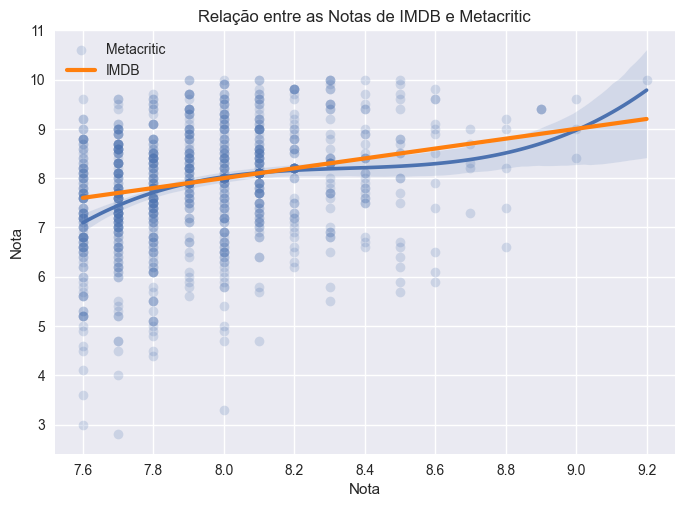

In [55]:
# Comparando as variações de nota entre metacritic e IMDB
sns.regplot(df, x='IMDB_Rating', y='Meta_score_1a10', label='Metacritic', order=3, scatter_kws={'alpha': 0.2})
sns.lineplot(df, x='IMDB_Rating', y='IMDB_Rating', label='IMDB', linewidth=3, color='#ff7f0e')
plt.legend()
plt.title('Relação entre as Notas de IMDB e Metacritic')
plt.xlabel('Nota')
plt.ylabel('Nota')
plt.show()

Há uma variação considerável entre as notas Metacritic e IMDB.

Pesquisando, entendi que a nota IMDB é uma média ponderada entre os usuários. Isto é, qualquer pessoa pode avaliar um filme. Já a nota Metacritic é uma média de críticos. Isso causa uma diferença de amostragem bem grande entre os dois, o que pode explicar a diferença, além da diferença de métricas entre o público geral e críticos ao avaliar um filme.

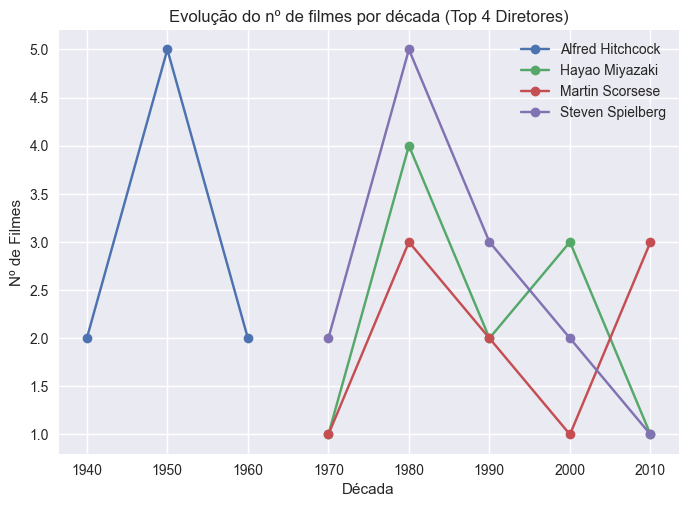

In [56]:
# 10 diretores mais frequentes
top10_directors = director_counts['Director'].head(4)
decade_director = df[df['Director'].isin(top10_directors)]

# Tabela cruzada
decade_director = decade_director.groupby(['Director', 'Decade'])['Series_Title'].count().unstack()

# Evolução do número de filmes por década para cada diretor
for director in decade_director.index:
    plt.plot(decade_director.columns, decade_director.loc[director], marker='o', label=director)

plt.xlabel('Década')
plt.ylabel('Nº de Filmes')
plt.title('Evolução do nº de filmes por década (Top 4 Diretores)')
plt.legend()
plt.show()

Pode se visualizar que Alfred Hitchcock era um diretor predominante nas décadas de 40 a 60.

Steven Spielberg chegou a dirigir 5 filmes em uma única década, em 1980 e, junto com Martin Scorsese e Hayao Miyazaki, se mantiveram dirigindo filmes por 4 décadas, de 1970 até 2010.

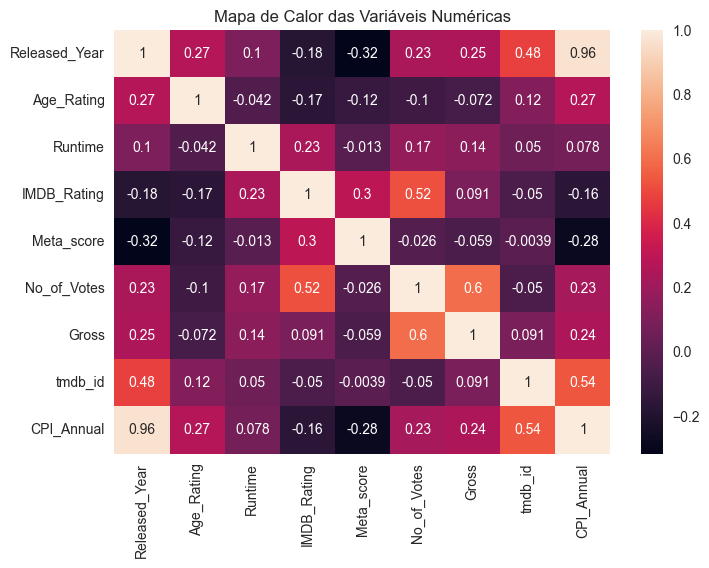

In [57]:
correlation = df.select_dtypes(include=np.number)[df.select_dtypes(include=np.number).columns[:-3]].corr()

sns.heatmap(correlation, annot=True)
plt.title('Mapa de Calor das Variáveis Numéricas')
plt.show()

Dentre as variáveis numéricas, a maior correlação observada é de ```No_of_Votes``` com ```IMDB_Rating``` (0.52) e ```Gross``` (0.6).

# Modelo Preditivo (```IMDB_Rating```) * Pular esta seção para evitar treino do modelo. Ir para Carregar o modelo

Como IMDB_Rating é uma variável qantitativa e contínua, este é um trabalho de regressão.

O passo a passo para previsão:
1. Feature Selection e Engineering: escolher quais variáveis serão utilizadas e quais transformações fazer.
2. Model Selection: Testar alguns modelos e avaliar quais retornam melhores resultados em dados não treinados.
3. Hyperparameter Tuning: Escolher um dos modelos e testar um range de hiperparâmetros e escolher os melhores.
4. Fazer a predição.

### Feature Selection & Engineering

No código abaixo foram feitos testes para avaliar as melhores features para os modelos apresentados em seguida.

In [58]:
from modelling_utils import replace_rare_list_elements, replace_rare_values

##### ------- ATENÇÃO ----------
# A maior parte das linhas aqui foram adicionadas após testes com os modelos abaixo
# Após testar muitas variações, decidi seguir não utilizando as colunas de Ator e Diretor e Age_Rating
# Elas variam muito pouco os resultados e adicionam muito ruído e os modelos já estão apresentando alto overfitting mesmo sem elas.

# Transformação em log, agiliza o treino e melhora alguns modelos
df['Gross_log'] = np.log1p(df['Gross'])
df['No_of_Votes_log'] = np.log1p(df['No_of_Votes'])
df['Count_Genres'] = df['Genre_list'].apply(lambda row: len(row)) # tentativa de simplificar o modelo

df_reduced = df.copy()

# Estas funções substituem diretores, atores, e gêneros com menos filmes que o segundo parâmetro por 'Outro'
df_reduced['Director'] = replace_rare_values(df_reduced['Director'], 10)
df_reduced['Age_Rating'] = replace_rare_values(df_reduced['Age_Rating'], 100)
df_reduced['Genre_list'] = replace_rare_list_elements(df_reduced['Genre_list'], 100)
df_reduced['Actors_list'] = replace_rare_list_elements(df_reduced['Actors_list'], 10)

# Multilabel encoder (categórico pra binário)
mlb_genre = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb_genre.fit_transform(df_reduced['Genre_list']), columns=mlb_genre.classes_, index=df_reduced.index)

mlb_actors = MultiLabelBinarizer()
actors_encoded = pd.DataFrame(mlb_actors.fit_transform(df_reduced['Actors_list']), columns=mlb_actors.classes_, index=df_reduced.index)

# Onehot encoding de Director e Age_Rating
director_encoded = pd.get_dummies(df_reduced['Director'], prefix='dir', prefix_sep='_')
age_encoded = pd.get_dummies(df_reduced['Age_Rating'], prefix='Age', prefix_sep='_')


X_numeric = df_reduced[['Decade', 'Runtime', 'Gross_log', 'Meta_score', 'No_of_Votes_log', 'Count_Genres']]
# X = pd.concat([X_numeric, genre_encoded, actors_encoded, director_encoded, age_encoded], axis=1) # usar essa linha para adicionar as outras colunas
X = X_numeric # comentar essa se usar a de cima

y = df['IMDB_Rating']

# Separando treino e teste. Dados de teste não entram em nenhum momento no treino, só servem pra avaliar predição
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # _test é o hold-out, será usado para avaliar após o treino do GridSearchCV

print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (703, 6)
Shape de X_test: (176, 6)
Shape de y_train: (703,)
Shape de y_test: (176,)


### Seleção de Modelo

In [65]:
# Configuração do KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Métricas personalizadas
scoring = {
    "R2": make_scorer(r2_score),
    "RMSE": make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    "MAE": make_scorer(mean_absolute_error)
}

# Lista de modelos
models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "ElasticNet": ElasticNet(),
        "DecisionTree": DecisionTreeRegressor(random_state=42),
        "RandomForest": RandomForestRegressor(random_state=42),
        "GradientBoosting": GradientBoostingRegressor(random_state=42),
        "KNN": KNeighborsRegressor(),
        "SVR": SVR(),
        "XGBoost": XGBRegressor(random_state=42),
        "LightGBM": LGBMRegressor(random_state=42),
        "CatBoost": CatBoostRegressor(random_state=42),
    }

# Resultados
results = []

for name, model in models.items():
    # Temos 3 modelos que precisam de standardization
    if name in ["SVR", "KNN", "MLP"]:
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model)
        ])
    else:
        pipeline = model

    scores = cross_validate(
        pipeline, X_train, y_train, cv=cv, scoring=scoring,
        return_train_score=True
    )
    
    results.append({
        "Modelo": name,
        "R² Treino": np.mean(scores["train_R2"]),
        "R² Validação": np.mean(scores["test_R2"]),
        "RMSE Treino": np.mean(scores["train_RMSE"]),
        "RMSE Validação": np.mean(scores["test_RMSE"]),
        "MAE Treino": np.mean(scores["train_MAE"]),
        "MAE Validação": np.mean(scores["test_MAE"])
    })

df_results = pd.DataFrame(results).sort_values(by="R² Validação", ascending=False)

r2_results = df_results[['Modelo', 'R² Treino', 'R² Validação']].sort_values(by="R² Validação", ascending=False)
rmse_results = df_results[['Modelo', 'RMSE Treino', 'RMSE Validação']].sort_values(by="RMSE Validação")
mae_results = df_results[['Modelo', 'MAE Treino', 'MAE Validação']].sort_values(by="MAE Validação")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 533
[LightGBM] [Info] Number of data points in the train set: 562, number of used features: 6
[LightGBM] [Info] Start training from score 7.946975
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [66]:
r2_results

,Modelo,R² Treino,R² Validação
6,GradientBoosting,0.814215,0.591540
11,CatBoost,0.946234,0.573905
5,RandomForest,0.937717,0.569372
8,SVR,0.722298,0.545104
10,LightGBM,0.903801,0.539764
9,XGBoost,0.999300,0.519094
7,KNN,0.625011,0.436458
1,Ridge,0.434599,0.421690
0,LinearRegression,0.434601,0.421667
4,DecisionTree,1.000000,0.168572


In [61]:
rmse_results

,Modelo,RMSE Treino,RMSE Validação
6,GradientBoosting,1.192807e-01,0.175864
11,CatBoost,6.412775e-02,0.179519
5,RandomForest,6.908926e-02,0.180787
8,SVR,1.458375e-01,0.184823
10,LightGBM,8.582911e-02,0.186588
9,XGBoost,7.249580e-03,0.190749
7,KNN,1.695666e-01,0.206943
1,Ridge,2.082199e-01,0.209673
0,LinearRegression,2.082195e-01,0.209675
4,DecisionTree,1.800121e-16,0.250406


In [62]:
mae_results

,Modelo,MAE Treino,MAE Validação
6,GradientBoosting,9.596516e-02,0.141598
11,CatBoost,5.093351e-02,0.143533
5,RandomForest,5.491868e-02,0.145732
8,SVR,1.159720e-01,0.146355
10,LightGBM,6.492941e-02,0.146765
9,XGBoost,4.934284e-03,0.152175
7,KNN,1.355549e-01,0.164232
1,Ridge,1.662840e-01,0.167609
0,LinearRegression,1.662984e-01,0.167627
4,DecisionTree,3.663751e-17,0.195713


O GradientBoosting obteve os melhores resultados nas três métricas. Podemos ver que todos os modelos baseados em árvore causaram overfitting. O SVR e KNN também, ainda que menos.

Os modelos lineares tiveram resultados muito abaixo mesmo sem overfitting, então seguiremos com o GradientBoosting.

### Hyperparameter Tuning

In [61]:
# Função auxiliar RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Função auxiliar para calcular métricas
def metrics(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": root_mean_squared_error(y_true, y_pred),
        "R²": r2_score(y_true, y_pred)
    }

# Função que engloba o modelo para repetir com mais facilidade posteriormente
def gboosting_model(X, y, param_grid, cv_splits=5, test_size=0.2, random_state=42):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)
    
    # Modelo base GradientBoosting
    model = GradientBoostingRegressor(random_state=random_state)

    # Métricas de avaliação
    scoring = 'neg_root_mean_squared_error'  # métrica usada para refit

    cv = KFold(n_splits=cv_splits, shuffle=True, random_state=random_state)

    # GridSearch
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
        refit=True,   # refit pelo scoring principal
        return_train_score=True,
        n_jobs=-1
    )

    print('Train cols:', X_train.columns.nunique())
    print('Test cols:', X_test.columns.nunique())

    grid_search.fit(X_train, y_train)

    # Melhor modelo
    best_model = grid_search.best_estimator_

    # Predições
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test) # predição em hold-out

    train_metrics = metrics(y_train, y_train_pred)
    test_metrics = metrics(y_test, y_test_pred) # Avaliação do modelo em hold-out
    
    # DataFrame de resultados
    metrics_df = pd.DataFrame([train_metrics, test_metrics], index=["Treino", "Teste"])

    # Importâncias das features
    feature_importance = pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": best_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    return {
        "best_model": best_model,
        "grid_search": grid_search,
        "metrics": metrics_df,
        "feature_importance": feature_importance,
        "best_params": grid_search.best_params_
    }

#### Teste 1

In [58]:
# Grid de parâmetros

# Valores padrão
# n_estimators = 100
# learning_rate = 0.1
# max_depth = 3
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [2, 3],
    'subsample': [0.8, 1.0]
}

gs_gboosting = gboosting_model(X, y, param_grid)

print(gs_gboosting['best_params'])

gs_gboosting['metrics']

Train cols: 6
Test cols: 6
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


,MAE,RMSE,R²
Treino,0.099446,0.122756,0.803594
Teste,0.146007,0.194561,0.505820


#### Teste 2

Vamos jogar alguns parâmetros para tentar reduzir overfitting.

In [ ]:
param_grid = {
    'learning_rate': [0.005, 0.01, 0.05],
    'n_estimators': [200, 400, 600, 800],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 0.9],
    'max_features': ['sqrt', 0.8]
}

gs_gboosting = gboosting_model(X, y, param_grid)

print(gs_gboosting['best_params'])

gs_gboosting['metrics']

Train cols: 6
Test cols: 6
{'learning_rate': 0.01, 'max_depth': 3, 'max_features': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 800, 'subsample': 0.7}


,MAE,RMSE,R²
Treino,0.107953,0.134335,0.764794
Teste,0.146700,0.193177,0.512830


Esse nível de refino é alto, e os valores de treino cairam bem mais que os de teste aumentaram. Vamos testar alguns valores próximos de:

```{'learning_rate': 0.01, 'max_depth': 3, 'max_features': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 800, 'subsample': 0.7}```

#### Teste 3

In [ ]:
param_grid_refined = {
    'learning_rate': [0.005, 0.01, 0.02],
    'n_estimators': [700, 800, 900],
    'max_depth': [2, 3, 4],
    'subsample': [0.7, 0.75, 0.8],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [3, 4, 5],
    'max_features': [0.7, 0.8, 0.9]
}

gs_gboosting = gboosting_model(X, y, param_grid)

print(gs_gboosting['best_params'])

gs_gboosting['metrics']

Train cols: 6
Test cols: 6
{'learning_rate': 0.01, 'max_depth': 3, 'max_features': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 800, 'subsample': 0.7}


,MAE,RMSE,R²
Treino,0.107953,0.134335,0.764794
Teste,0.146700,0.193177,0.512830


O terceiro teste retornou os mesmos parâmetros do segundo. Portanto esses devem ser os melhores hiperparâmetros mesmo.

### Feature Importance

Podemos ver um ranking de quais variáveis mais ajudam a reduzir as impurezas do modelo

In [663]:
gs_gboosting['feature_importance'].head(20)

,Feature,Importance
4,No_of_Votes_log,0.508548
3,Meta_score,0.149614
2,Gross_log,0.149356
1,Runtime,0.098090
0,Decade,0.091445
5,Count_Genres,0.002946


Aqui pode-se ver que uma coluna de contagem de gêneros ajuda muito pouco o modelo a aprender nos dados.

### Treino do modelo final

In [59]:
X_train_final = X_train[['Decade', 'Runtime', 'Gross_log', 'Meta_score', 'No_of_Votes_log']] # removendo a coluna Count_Genres, auxilia muito pouco na predição
X_test_final = X_test[['Decade', 'Runtime', 'Gross_log', 'Meta_score', 'No_of_Votes_log']]

In [62]:
model = GradientBoostingRegressor(random_state=42, **{'learning_rate': 0.01, 'max_depth': 3, 'max_features': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 800, 'subsample': 0.7})

model.fit(X_train_final, y_train)

y_test_pred = model.predict(X_test_final) # predição em hold-out

metrics(y_test, y_test_pred) # Avaliação do modelo em hold-out

{'MAE': 0.14710259674749618,
 'RMSE': np.float64(0.1922486207765005),
 'R²': 0.5174992543991404}

In [63]:
filename = "model.pkl"

with open(filename, "wb") as file:
    pickle.dump(model, file)

# Carregar o modelo e prever The Shawshank Redemption

In [64]:
import pickle
import pandas as pd
import numpy as np

with open("model.pkl", "rb") as file:
    model = pickle.load(file)

In [65]:
# Previsão de The Shawshank Redemption
novo_filme = {'Series_Title': 'The Shawshank Redemption',
'Released_Year': '1994',
'Certificate': 'A',
'Runtime': '142 min',
'Genre': 'Drama',
'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
'Meta_score': 80.0,
'Director': 'Frank Darabont',
'Star1': 'Tim Robbins',
'Star2': 'Morgan Freeman',
'Star3': 'Bob Gunton',
'Star4': 'William Sadler',
'No_of_Votes': 2343110,
'Gross': '28,341,469'}

# Transformar em DataFrame
for k in novo_filme.keys():
    novo_filme[k] = [novo_filme[k]]
filme_df = pd.DataFrame(novo_filme)

# Repetindo as transformações feitas durante o treino
filme_df['Runtime'] = filme_df['Runtime'].str.replace(" min", "").astype(int)
filme_df['Gross'] = filme_df['Gross'].str.replace(",", "").astype(float) # float pra aceitar os NaN, usar int dá erro
filme_df['Gross_log'] = np.log1p(filme_df['Gross'])
filme_df['No_of_Votes_log'] = np.log1p(filme_df['No_of_Votes'])
filme_df['Decade'] = filme_df['Released_Year'].astype(int)//10*10

# Escolhendo as mesmas colunas que foram utilizadas no treino
filme_X = filme_df[['Decade', 'Runtime', 'Gross_log', 'Meta_score', 'No_of_Votes_log']]

# Predição
filme_y = model.predict(filme_X)

# Resultado
print("Previsão de IMDB Rating:", filme_y[0])

Previsão de IMDB Rating: 8.845390953793721


Acessando o site do IMDB, The Shawshank Redemption tem nota IMDB de 9.3.